In [23]:
!pip install -U imbalanced-learn
!pip install tensorflow_hub

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
X=df[df.columns[:-1]].values
y=df[df.columns[-1]].values

In [20]:
scaler= StandardScaler()
X=scaler.fit_transform(X)
data=np.hstack((X, np.reshape(y, (-1,1))))
transformed_df=pd.DataFrame(data, columns=df.columns)
transformed_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0


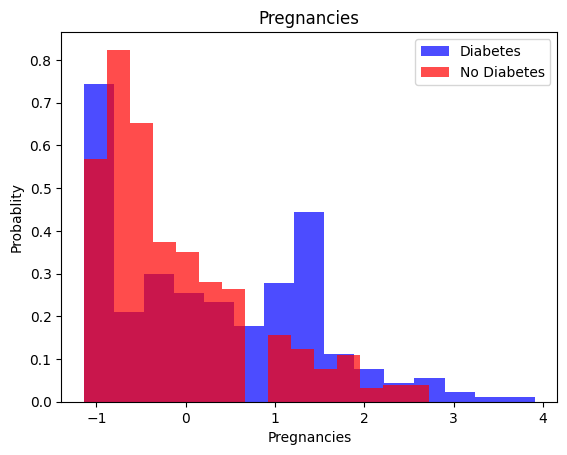

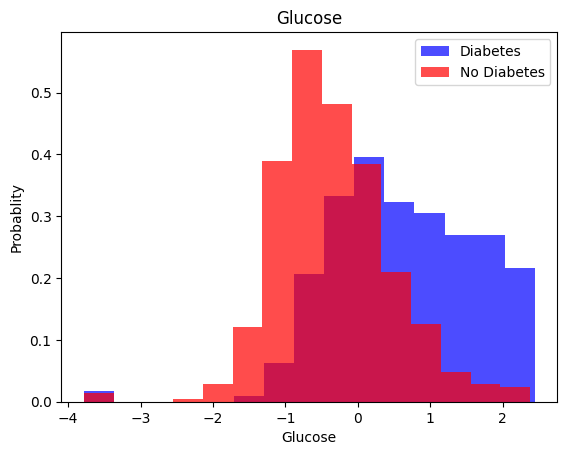

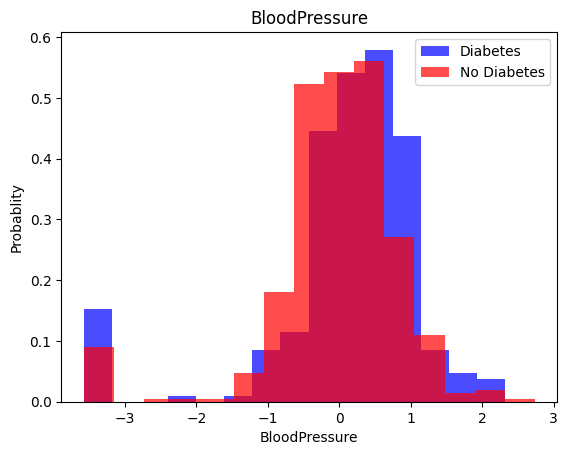

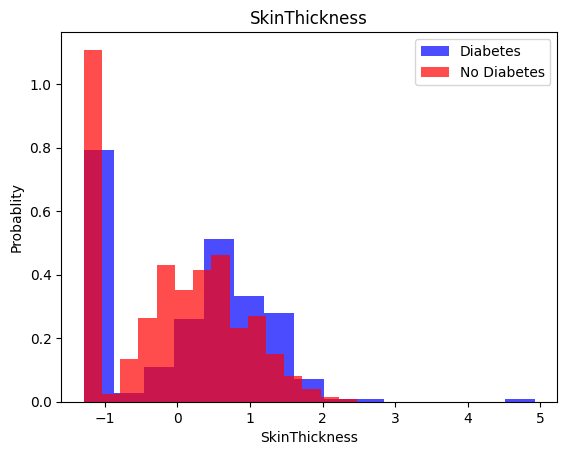

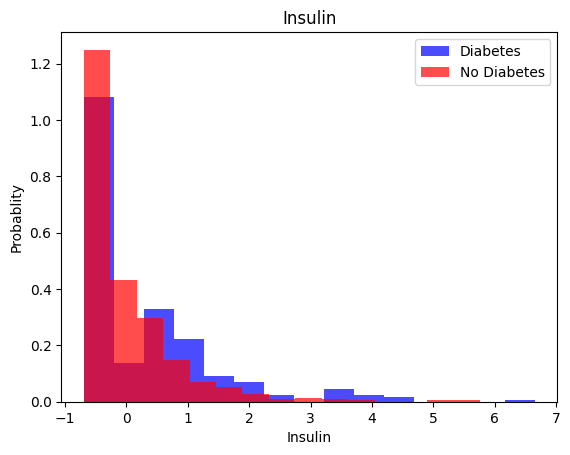

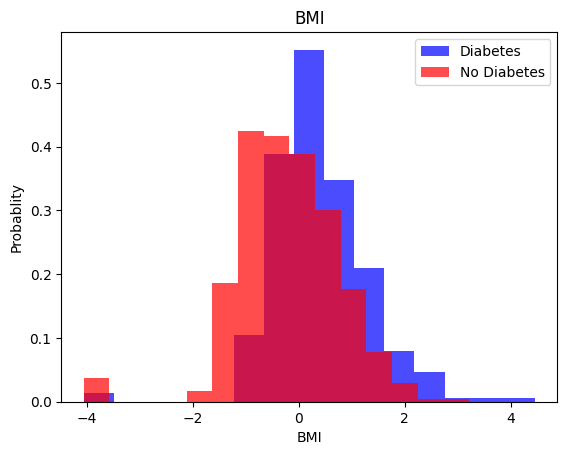

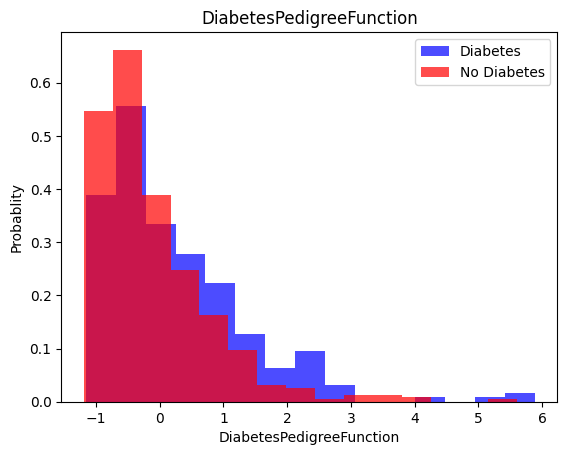

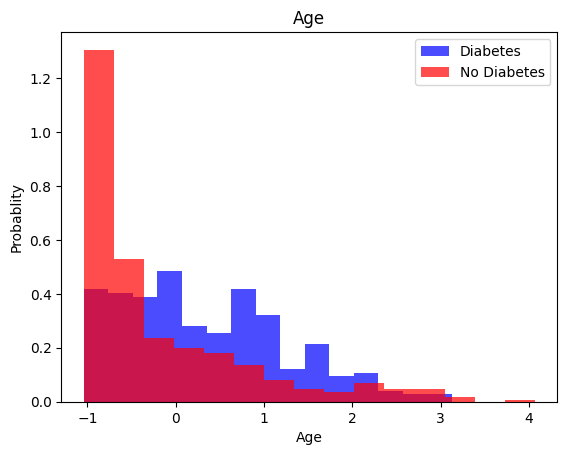

In [21]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color='blue', label='Diabetes', alpha=0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color='red', label='No Diabetes', alpha=0.7, density=True, bins=15)
  plt.legend()
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probablity')
  plt.show()


In [26]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data=np.hstack((X, np.reshape(y, (-1,1))))
transformed_df=pd.DataFrame(data, columns=df.columns)
#transformed_df.head()

len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [27]:

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # maps to 0 or 1
])

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
              )

In [30]:
model.evaluate(X_train, y_train)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5226 - loss: 0.7175   


[0.718553364276886, 0.503333330154419]

In [31]:
model.evaluate(X_valid, y_valid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4359 - loss: 0.7414 


[0.7224870324134827, 0.4699999988079071]

In [32]:
model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4987 - loss: 0.7116 - val_accuracy: 0.5500 - val_loss: 0.6869
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5749 - loss: 0.6713 - val_accuracy: 0.5700 - val_loss: 0.6588
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6275 - loss: 0.6535 - val_accuracy: 0.6150 - val_loss: 0.6382
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6723 - loss: 0.6395 - val_accuracy: 0.6600 - val_loss: 0.6216
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6806 - loss: 0.6347 - val_accuracy: 0.6950 - val_loss: 0.6067
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6769 - loss: 0.6225 - val_accuracy: 0.7200 - val_loss: 0.5908
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6844 - loss: 0.5957 - val_accuracy: 0.7150 - val_loss: 0.5769
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6814 - loss: 0.6091 - val_accuracy: 0.7300 - val_los

In [33]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7590 - loss: 0.4681


[0.49650782346725464, 0.7450000047683716]